# WeatherPy

Trend 1: As you near the equator, temperatures generally increase. However, between latitudes 0 and 40, temperatures are currently higher because the Northern hemisphere is in Summer season. Temperatures between 0 and -40 are lower because the Southern hemisphere is currently in Winter season.

Trend 2: During Summer season, the Northern hemisphere is generally more humid than the Southern hemisphere.

Trend 3: During Summer season, cities in the Northern hemisphere tend to be more cloudy than those in the Southern hemisphere.


In [100]:
#!pip install citipy

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

In [103]:
# Testing Sandbox
units = "imperial"
test = "grand river south east"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&units" + units + "&q=" + test

response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))


{
    "cod": 429,
    "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"
}


## Perform API Calls

In [104]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL and save config information
query_url = f"{url}appid={api_key}&units={units}&q="
units = "imperial"

# Set-up lists to hold response data
lat = []
lng = []
cloud = []
country = []
date = []
humidity = []
maxTemp = []
wind = []

In [105]:
# Create dataframe and columns to store city weather conditions
cityWeatherDF = pd.DataFrame({"City": cities})                       
cityWeatherDF["Cloudiness"] = ""
cityWeatherDF["Country"] = ""
cityWeatherDF["Date"] = ""
cityWeatherDF["Humidity"] = "" 
cityWeatherDF["Latitude"] = ""
cityWeatherDF["Longitude"] = ""
cityWeatherDF["Max Temp"] = ""
cityWeatherDF["Wind Speed"] = ""
#cityWeatherDF.head()

In [106]:
# Loop through all cities to capture data
for index, row in cityWeatherDF.iterrows():
    
    # Incorporate exception handling to skip cities that are missing a data point.
    try:
    
        # Get city name from cityWeatherDF 
        city = row["City"]
    
        # Assemble URL and make API request for each city
        response = requests.get(query_url + city).json()
    
        # Get specific column data 
        cloud = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        maxTemp = response['main']['temp_max']
        wind = response['wind']['speed']
        
        # Add row information to the city weather dataframe
        cityWeatherDF.at[index, 'Cloudiness'] = cloud
        cityWeatherDF.at[index, 'Country'] = country
        cityWeatherDF.at[index, 'Date'] = date
        cityWeatherDF.at[index, 'Humidity'] = humidity
        cityWeatherDF.at[index, 'Latitude'] = lat
        cityWeatherDF.at[index, 'Longitude'] = lng
        cityWeatherDF.at[index, 'Max Temp'] = maxTemp
        cityWeatherDF.at[index, 'Wind Speed'] = wind
        print(f"Processing Record {index} | {city}\n {query_url}")
        
    # Skip cities with missing data point and continue looping
    except (KeyError, IndexError) as error:
        print(f"Processing Record {index} | {city}")
        print(f"{city} Missing field/result... skipping.") 
        pass 
 
 # Drop null values
cityWeatherDF.dropna(how='any', inplace=True)
    
 # Print dataframe
cityWeatherDF.head()



Processing Record 0 | kapaa
kapaa Missing field/result... skipping.
Processing Record 1 | alofi
alofi Missing field/result... skipping.
Processing Record 2 | trairi
trairi Missing field/result... skipping.
Processing Record 3 | bolungarvik
bolungarvik Missing field/result... skipping.
Processing Record 4 | conde
conde Missing field/result... skipping.
Processing Record 5 | tilichiki
tilichiki Missing field/result... skipping.
Processing Record 6 | hobart
hobart Missing field/result... skipping.
Processing Record 7 | burnie
burnie Missing field/result... skipping.
Processing Record 8 | askim
askim Missing field/result... skipping.
Processing Record 9 | tukrah
tukrah Missing field/result... skipping.
Processing Record 10 | khatanga
khatanga Missing field/result... skipping.
Processing Record 11 | carnarvon
carnarvon Missing field/result... skipping.
Processing Record 12 | asau
asau Missing field/result... skipping.
Processing Record 13 | nanortalik
nanortalik Missing field/result... skip

Processing Record 110 | wahiawa
wahiawa Missing field/result... skipping.
Processing Record 111 | buala
buala Missing field/result... skipping.
Processing Record 112 | lakatoro
lakatoro Missing field/result... skipping.
Processing Record 113 | ancud
ancud Missing field/result... skipping.
Processing Record 114 | chuy
chuy Missing field/result... skipping.
Processing Record 115 | port-cartier
port-cartier Missing field/result... skipping.
Processing Record 116 | fershampenuaz
fershampenuaz Missing field/result... skipping.
Processing Record 117 | saint george
saint george Missing field/result... skipping.
Processing Record 118 | yellowknife
yellowknife Missing field/result... skipping.
Processing Record 119 | hokitika
hokitika Missing field/result... skipping.
Processing Record 120 | port alfred
port alfred Missing field/result... skipping.
Processing Record 121 | mount gambier
mount gambier Missing field/result... skipping.
Processing Record 122 | waingapu
waingapu Missing field/result

Processing Record 216 | sauce
sauce Missing field/result... skipping.
Processing Record 217 | mount isa
mount isa Missing field/result... skipping.
Processing Record 218 | saint anthony
saint anthony Missing field/result... skipping.
Processing Record 219 | setermoen
setermoen Missing field/result... skipping.
Processing Record 220 | buchanan
buchanan Missing field/result... skipping.
Processing Record 221 | kargil
kargil Missing field/result... skipping.
Processing Record 222 | marcona
marcona Missing field/result... skipping.
Processing Record 223 | port-gentil
port-gentil Missing field/result... skipping.
Processing Record 224 | roald
roald Missing field/result... skipping.
Processing Record 225 | zaozerne
zaozerne Missing field/result... skipping.
Processing Record 226 | buqayq
buqayq Missing field/result... skipping.
Processing Record 227 | srednekolymsk
srednekolymsk Missing field/result... skipping.
Processing Record 228 | grand river south east
grand river south east Missing fi

Processing Record 324 | sosnovskiy
sosnovskiy Missing field/result... skipping.
Processing Record 325 | yining
yining Missing field/result... skipping.
Processing Record 326 | puerto escondido
puerto escondido Missing field/result... skipping.
Processing Record 327 | afgoye
afgoye Missing field/result... skipping.
Processing Record 328 | araouane
araouane Missing field/result... skipping.
Processing Record 329 | constitucion
constitucion Missing field/result... skipping.
Processing Record 330 | salalah
salalah Missing field/result... skipping.
Processing Record 331 | deputatskiy
deputatskiy Missing field/result... skipping.
Processing Record 332 | tiksi
tiksi Missing field/result... skipping.
Processing Record 333 | sao joao da barra
sao joao da barra Missing field/result... skipping.
Processing Record 334 | road town
road town Missing field/result... skipping.
Processing Record 335 | kampot
kampot Missing field/result... skipping.
Processing Record 336 | nouakchott
nouakchott Missing 

Processing Record 432 | bagdarin
bagdarin Missing field/result... skipping.
Processing Record 433 | altamirano
altamirano Missing field/result... skipping.
Processing Record 434 | hecun
hecun Missing field/result... skipping.
Processing Record 435 | venado tuerto
venado tuerto Missing field/result... skipping.
Processing Record 436 | ozgon
ozgon Missing field/result... skipping.
Processing Record 437 | milkovo
milkovo Missing field/result... skipping.
Processing Record 438 | toliary
toliary Missing field/result... skipping.
Processing Record 439 | mullaitivu
mullaitivu Missing field/result... skipping.
Processing Record 440 | hasaki
hasaki Missing field/result... skipping.
Processing Record 441 | sabang
sabang Missing field/result... skipping.
Processing Record 442 | orlik
orlik Missing field/result... skipping.
Processing Record 443 | bousso
bousso Missing field/result... skipping.
Processing Record 444 | codajas
codajas Missing field/result... skipping.
Processing Record 445 | cidrei

Processing Record 547 | pasni
pasni Missing field/result... skipping.
Processing Record 548 | bulungu
bulungu Missing field/result... skipping.
Processing Record 549 | kushmurun
kushmurun Missing field/result... skipping.
Processing Record 550 | sistranda
sistranda Missing field/result... skipping.
Processing Record 551 | velsk
velsk Missing field/result... skipping.
Processing Record 552 | melfort
melfort Missing field/result... skipping.
Processing Record 553 | gashua
gashua Missing field/result... skipping.
Processing Record 554 | urucara
urucara Missing field/result... skipping.
Processing Record 555 | peniche
peniche Missing field/result... skipping.
Processing Record 556 | karkaralinsk
karkaralinsk Missing field/result... skipping.
Processing Record 557 | bogale
bogale Missing field/result... skipping.
Processing Record 558 | anloga
anloga Missing field/result... skipping.
Processing Record 559 | piacabucu
piacabucu Missing field/result... skipping.
Processing Record 560 | ndjole

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kapaa,,,,,,,,
1,alofi,,,,,,,,
2,trairi,,,,,,,,
3,bolungarvik,,,,,,,,
4,conde,,,,,,,,


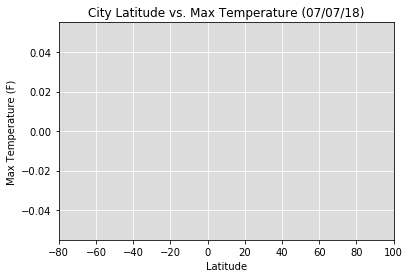

In [107]:
# Temperature (F) vs. Latitude

# Convert column objects to numeric/float data type
cityWeatherDF["Latitude"] = pd.to_numeric(cityWeatherDF["Latitude"])
cityWeatherDF["Max Temp"] = pd.to_numeric(cityWeatherDF["Max Temp"])
cityWeatherDF["Humidity"] = pd.to_numeric(cityWeatherDF["Humidity"])
cityWeatherDF["Cloudiness"] = pd.to_numeric(cityWeatherDF["Cloudiness"])
cityWeatherDF["Wind Speed"] = pd.to_numeric(cityWeatherDF["Wind Speed"])
#print(cityWeatherDF.dtypes)

# Create the scatter plot, legend and axes titles
tempLat = cityWeatherDF.plot(kind = 'scatter', x="Latitude", y="Max Temp",  facecolors="midnightblue", edgecolors="black",  alpha=1, zorder=2) 
tempLat.set_facecolor("gainsboro")

plt.title("City Latitude vs. Max Temperature (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.grid(color = "white")
plt.savefig("Images/Temperature.png")
plt.show()

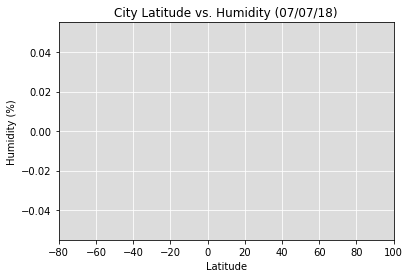

In [108]:
# Humidity (%) vs. Latitude

# Create the scatter plot, legend and axes titles
humidLat = cityWeatherDF.plot(kind = 'scatter', x="Latitude", y="Humidity",  facecolors="midnightblue", edgecolors="black",  alpha=1, zorder=2) 
humidLat.set_facecolor("gainsboro")

plt.title("City Latitude vs. Humidity (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.grid(color = "white")
plt.savefig("Images/Humidity.png")
plt.show()


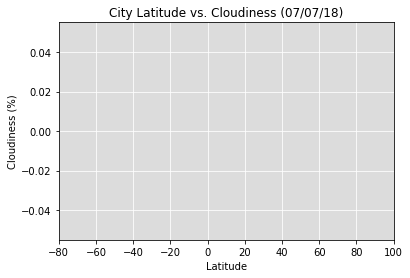

In [109]:
# Cloudiness (%) vs. Latitude

# Create the scatter plot, legend and axes titles
cloudLat = cityWeatherDF.plot(kind = 'scatter', x="Latitude", y="Cloudiness",  facecolors="midnightblue", edgecolors="black",  alpha=1, zorder=2) 
cloudLat.set_facecolor("gainsboro")

plt.title("City Latitude vs. Cloudiness (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.grid(color = "white")
plt.grid(zorder=0)
plt.savefig("Images/Cloudiness.png")
plt.show()


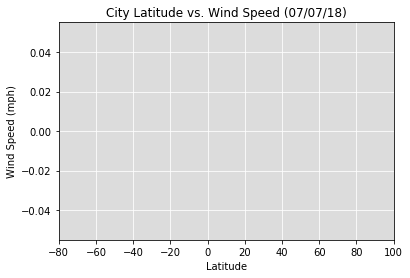

In [110]:
# Wind Speed (mph) vs. Latitude

# Create the scatter plot, legend and axes titles
windLat = cityWeatherDF.plot(kind = 'scatter', x="Latitude", y="Wind Speed",  facecolors="midnightblue", edgecolors="black",  alpha=1, zorder=2) 
windLat.set_facecolor("gainsboro")

plt.title("City Latitude vs. Wind Speed (07/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.grid(color = "white")

plt.savefig("Images/Wind Speed.png")
plt.show()